<h1>Data Interpretation and Storytelling</h1>
    <p>Authored and presented by <a href="https://www.iwi.unibe.ch/ueber_uns/personen/prof_dr_khobzi_hamid/index_ger.html">Prof. Dr. Hamid Khobzi</a> from the Universtiy of Bern for PyLadies, Amsterdam on 30.09.2020.</p>
    <p>The link to the data resource: <a href="https://archive.ics.uci.edu/ml/datasets/Online+Retail+II">Click Here.</a></p>
    <h2>Business Problem</h2>

<p>In this exercise, the focus is on a business case from a real online retail store based in UK. As the CIO of the company has declared to the data science team, the goal of the project is to find hidden patterns and insights from data that can help business with better targeting strategies.</p>
<p>You, as a member of the data science team, are provided with a dataset that contains purchase transactions of the retail store. The first challenge is to conduct exploratory data analysis using data transformation and visualization. To serve this purpose, the data science team has decided to use a particular conceptual framework, namely RFM, to conduct the analysis and interpret the data. RFM Analysis is a conceptually-based analysis that sheds light on behavioral characteristics of customers/users, and is open for interpretation in different contexts. RFM stands for:<p>
<ul>
    <li><b>(R) Recency:</b> The interval between the purchase and the time of analysis.</li>
<li><b>(F) Frequency:</b> The number of purchases within a certain period.</li>
<li><b>(M) Monetary:</b> The amount of money spent during a certain period.</li>
</ul>

<p>The second challenge is to generate information in the form of visualizations and tables, that can contribute to a suitable storytelling.</p>
<p>With all that being said, let's begin the analysis!</p>

<h2>Reading Data</h2>

<p>We need to load pandas library for data wrangling. Pandas is a Python library that allows us to work with data structures and perform various operations on them. Afterward, we should use a pandas method to read the data for further processing.</p>

In [1]:
import pandas as pd
import zipfile

ZippedFile = zipfile.ZipFile('online_retail_v2.0.zip') 
org_data = pd.read_csv(ZippedFile.open('online_retail_v2.0.csv'))


<p>Let's take a look at the data by showing the first 3 records.</p>

In [2]:
org_data.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


<p>Question: What part of this data could be useful for generating insights?<p>

<h2>Data Cleansing</h2>

<p>Since the data was stored as a CSV file, the values need to be converted from a string to their natural type. For instance:</p>
<ul>
    <li>"Quantity" should be converted to an integer number.</li>
    <li>"Price" should be converted to a float number.</li>
    <li>"InvoiceDate" should be converted to a datetime format.</li>
</ul>

In [3]:
org_data['Quantity'] = org_data['Quantity'].astype('int64')                                        #converting Quantity to an integer number
org_data['InvoiceDate'] = pd.to_datetime(org_data['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')      #converting InvoiceDate to a datetime format

<h3>Exercise:</h3>

<p>Now, you may try to convert the attribute "Price" to a data type float.</p>

In [4]:
org_data['Price'] = org_data['Price'].astype('float')                                              #converting Price to an float number

<p>In the next step, to make sure there is no missing values in the data, we exclude any record of data that contains a missing value for any of the data attributes.</p>

In [5]:
org_data = org_data.dropna(how='any', axis='rows')

<p>Now, we need to inspect the data for any existing problem. For this purpose, we can draw a box plot for variables to check their distribution, outliers, or any other issues. A box plot is a very useful visualization technique for inspecting the data and finding potential problems. Now, we must load pyplot API, which is a Matlab-like plotting framework, to be able to visualize the data using box plots.<p>

Text(0, 0.5, 'Order Quantity')

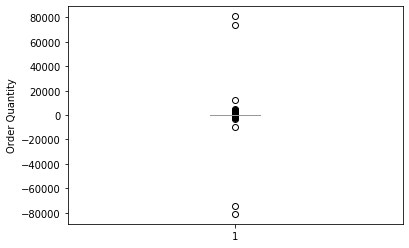

In [6]:
import matplotlib.pyplot as plt

plt.boxplot(org_data['Quantity'])
plt.ylabel('Order Quantity')

<h3>Exercise:</h3>
<p>Now, you may try to visualize the attribute "Price" by using a box plot.</p> 

Text(0, 0.5, 'Product Price')

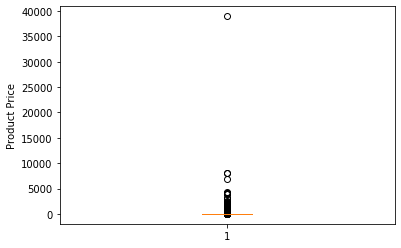

In [7]:
plt.boxplot(org_data['Price'])
plt.ylabel('Product Price')

<p>We can observe two major problems for both variables. First, both variables contain negative values, while order quantity and product price cannot be negative or zero. Second, there are outliers in the data that is better to be excluded from the analysis.<p> 

In [8]:
CleanData = org_data[org_data.Quantity>0]                                         #Keeping data records with a value of higher than 0 for Quantity
CleanData = CleanData[CleanData.Price>0]                                          #Keeping data records with a value of higher than 0 for Price
CleanData = CleanData[CleanData.Quantity < org_data['Quantity'].quantile(0.9)]    #Erasing (triming) outliers based on Quantity
CleanData = CleanData[CleanData.Price < org_data["Price"].quantile(0.9)]          #Erasing (triming) outliers based on Price

<h2>Data Transformation for RFM Analysis</h2>

<p>Now that the data is cleansed, it is time to prepare the data for RFM analysis. Accordingly, we need to transform our data. In other words, we need to generate new attributes in the data based on the existing attributes.</p>
<p>First, we need to generate a new attribute that shows how many days ago the transaction was performed. So, we need to generate this new attribute based on "InoviceDate." In the first step, we only keep the date and store it in a new column called "Date." Then, we calculate the interval between the transaction date and the date of the last transaction in the data in terms of days.</p>
<p>Second, we need to generate another attribute that shows the amount of sales for each transaction. We already have the order quantity and the product price in the data. So, we need to multiply those two values and store the outcome in a new attribute called "Sales."</p>

In [9]:
#storing transaction date in a new attribute
CleanData['Date'] = CleanData['InvoiceDate'].dt.date    
#calculating and storing interval between transaction date and the day in which the last transaction was done in a new attribute
CleanData['PurchaseInterval'] = (max(CleanData.Date) - CleanData['Date']).dt.days  

<h3>Exercise:</h3>
<p>Now, you may try to generate the Sales from the existing attributes including order quantity and product price.</p> 

In [10]:
#calculating and storing sales amount for each transaction in a new attribute
CleanData['Sales'] = CleanData.Quantity * CleanData.Price

<p>All right! Let's take a look at the data.</p>

In [11]:
CleanData.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,PurchaseInterval,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,373,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,373,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,373,22.00


<p>Now, we need to aggregate the data based on customers and find out when they have done their last transaction, how many transactions they have performed, and how much they have spent in the online retail store in the whole time.</p> Then, we store these newly generated attributes for further analysis.</p>

In [12]:
RFM_Data = CleanData.groupby('Customer ID').agg(Recency=('PurchaseInterval','min'), Frequency=('Sales','count'), Monetary=('Sales','sum'))


<h3>Exercise:</h3>
<p>Now, you may try to inspect the first three rows in the newly generated dataset for RFM attributes.</p> 

In [13]:
RFM_Data.head(3)

,Recency,Frequency,Monetary
Customer ID,,,
12347.0,2,140,2768.97
12348.0,248,1,17.00
12349.0,18,54,942.75


<p>Question: How do we interpret the numbers in the above table?</p>

<p>Let's look at the first row.</p>
<p>This customer has ordered one or more products from the retail store 2 days ago. This shows that this customer is likely to be coming back to the store for shopping more often. Also, he has shopped a total of 140 times. This also supports the assumption that this customer shops from the retail store regularly. Moreover, this customer has spent a total of more than 2700 pounds. On the other hand, the customer in the second row, has only shopped one time and that was done 248 days ago with only spending 17 pounds. A simple comparison shows customer "12347.0" is more loyal to the retail store than customer "12348.0"</p>

<h2>Visualizing RFM Attributes</h2>

<p>Now, let's find some patterns based on RFM attributes by visualizing the data. We can start with a scatter matrix, which show us the distribution of all data attributes and their plausible correlations.</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023601659F28>,
      dtype=object)

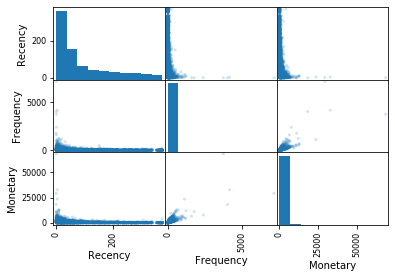

In [14]:

pd.plotting.scatter_matrix(RFM_Data, alpha=0.2)

<p>Among the above visualizations, the one on top left is likely to give us some interesting insights. Let's look at it closely. </p>
<p>That visualization is a histogram. So, we need to draw a histogram for Recency attribute.</p>

Text(0, 0.5, 'Number of Customers')

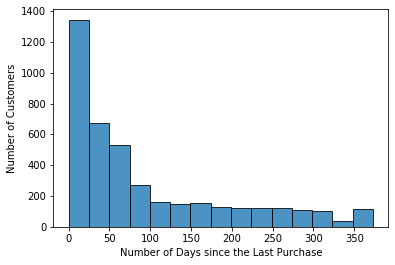

In [15]:
plt.hist(RFM_Data['Recency'], bins=15, edgecolor = 'black', alpha=0.8)
plt.xlabel('Number of Days since the Last Purchase')
plt.ylabel('Number of Customers')

<h3>Exercise:</h3>
<p>How can we interpret the information presented in this plot?</p>
<p>Is there a way we can make this figure more informative and interesting?</p>

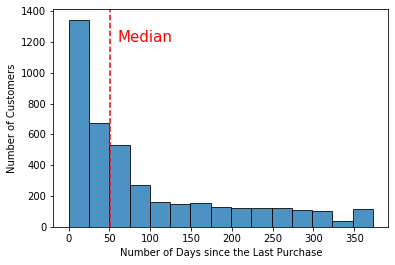

In [16]:
plt.hist(RFM_Data['Recency'], bins=15, edgecolor = 'black', alpha=0.8)
plt.axvline(RFM_Data['Recency'].median(), color='red', linestyle='dashed', linewidth=1.5)
plt.text(60, 1200, 'Median', color='red', fontsize=15)
plt.xlabel('Number of Days since the Last Purchase')
plt.ylabel('Number of Customers')
plt.savefig('RecencyHistogram.png', dpi=300)

<p>This plot is actually a useful piece of information that could be a part of the report. In other words, we can tell a good story based on this plot, and that will help front-line decision makers to design better targetting strategies.</p>

<h3>Exercise</h3>

<p>Now that you are familiar with RFM as a conceptual framework for analyzing data, you may redo the analysis on this data but with a focus on countries instead of customers. In the above example, we generated RFM parameters for each customer. This time, we want to generate those parameters for each country. Let's see whether you can find interesting insights. </p>

In [17]:
RFM_Data_Countries = CleanData.groupby('Country').agg(Recency=('PurchaseInterval','min'), Frequency=('Sales','count'), Monetary=('Sales','sum'))

<p>All right! Let's take a look at the newly generated data for RFM attributes.</p>

In [18]:
RFM_Data_Countries.head(3)

,Recency,Frequency,Monetary
Country,,,
Australia,15,415,7873.57
Austria,1,303,5512.39
Bahrain,204,10,218.30


<p>Question: How can we interpret the RFM attributes for different countries?</p>

<p>Let's look at Austria and Bahrain:</p>
<p>Austrian customers have ordered one or more products from the retail store 1 days ago. Also, they have shopped a total of 370 times with a total value of more than 5500 pounds. On the other hand, the Bahraini customers, has only shopped 10 times and their last purchase was done 204 days. Bahraini customers have generated a total revenue of nearly 220 pounds. A simple comparison shows Austria is a more important market for the retail store compared to Bahrain.</p>

<p>Now, let's rank the countries based on Monetary and Frequency attributes and look at the top 10 of them. Perhaps, a bar plot could be a good option to show such information.</p>

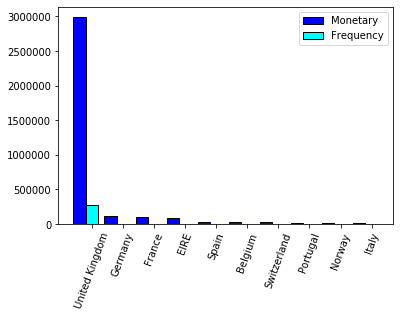

In [19]:
Sorted_Countries_data = RFM_Data_Countries.sort_values(['Monetary','Frequency'] , ascending=[False,False])
F_values_2 = Sorted_Countries_data.iloc[:10,1]
M_values_2 = Sorted_Countries_data.iloc[:10,2]

import numpy as np

bar_width = 0.4
r1 = np.arange(len(F_values_2))
r2 = [x + bar_width for x in r1]

plt.bar(r1, M_values_2, width = bar_width, color = 'blue', edgecolor = 'black', capsize=7, label='Monetary')
plt.bar(r2, F_values_2, width = bar_width, color = 'cyan', edgecolor = 'black', capsize=7, label='Frequency')

plt.xticks([r + bar_width for r in range(len(F_values_2))], Sorted_Countries_data.index, rotation='70')
plt.legend()
plt.show()

<p>Since the retail store is based in the UK, a big part of the observations is related to the UK. Presenting this chart as a part of the story is not really adequate. Because the chart is dominated by one country and the presented information for other countries are useless. </p>
<p>Let's suppose we want to focus on the international market. That could be a better story to tell. Thus, we repeat the above visualization after exclusion of the UK from the analysis.</p>

<h3>Exercise:</h3>
<p>How can we change the presentation of information in the above plot for the international market?</p>
<p>The first step is to only keep foreign countries. You may try to do that now.</p>

In [20]:
Sorted_Countries_data = Sorted_Countries_data.iloc[1:,]                 #erasing the record related to the United Kingdom

<p>Now, we should calculate the Monetary ratio for each foreign country and prepare the information for visualization.</p>

In [21]:
Sorted_Countries_data['MonetaryRatio'] = round(Sorted_Countries_data['Monetary']/sum(Sorted_Countries_data['Monetary'])*100,2)          #calculating the Monetary ratio for each foreign country
Sorted_Countries_data['Country'] = Sorted_Countries_data.index          #Creating a new column with country names
Sorted_Countries_data.head(5)

,Recency,Frequency,Monetary,MonetaryRatio,Country
Country,,,,,
Germany,0,6390,113098.70,23.26,Germany
France,0,5940,97552.48,20.06,France
EIRE,1,4589,82722.99,17.01,EIRE
Spain,2,1783,24716.91,5.08,Spain
Belgium,0,1465,24662.44,5.07,Belgium


In [22]:
PieData = Sorted_Countries_data.iloc[:5,[3,4]]
OthersRatio = round(100 - sum(Sorted_Countries_data.head(5)['MonetaryRatio']),2)
PieData = PieData.append({'Country':'Others','MonetaryRatio': OthersRatio}, ignore_index=True)

<p>Now, let's draw a pie chart to present the top 5 countries along with others with their market share.</p>

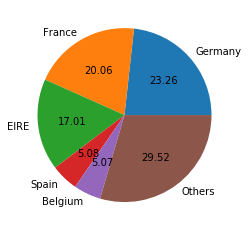

In [23]:
figureObject, axesObject = plt.subplots()
axesObject.pie(PieData['MonetaryRatio'], 
        labels=PieData['Country'],         #shows the country names next to each slice
        autopct='%1.2f')                   #shows the percentages on each slice
figureObject.savefig('PieChart.png', dpi=300)

<p>As we can see in the above bar chart, Germany is the largest international market followed by France and Ireland. Such information could be useful for developing marketing strategies. This pie chart is a good way of adding to the story. By presenting this pie chart to the frontline decision makers, we can help them improve their targetting strategies.</p>